# WorkFlow
## Load the data
## Clean the data
## Visualizing
## Preproccessing the data
## Modelling
## Submissions
## Repeat

## Load the data

In [1]:
# !unzip ./data.zip

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./train.csv')
data.drop('standard_error',axis=1,inplace=True)

In [4]:
test = pd.read_csv('./test.csv')

In [5]:
sample_sub = pd.read_csv('./sample_submission.csv')

## Clean the data

In [6]:
import seaborn as sns

In [7]:
data.dtypes

id            object
url_legal     object
license       object
excerpt       object
target       float64
dtype: object

<AxesSubplot:>

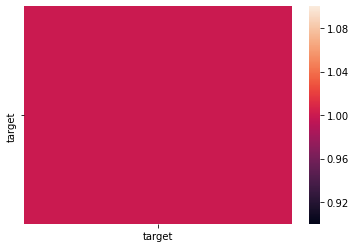

In [8]:
sns.heatmap(data.corr())

In [9]:
data.isna().sum()

id              0
url_legal    2004
license      2004
excerpt         0
target          0
dtype: int64

In [10]:
data['url_legal'].tail(1)

2833    https://en.wikibooks.org/wiki/Wikijunior:Biolo...
Name: url_legal, dtype: object

In [11]:
data['license'].tail(1)

2833    CC BY-SA 3.0
Name: license, dtype: object

In [12]:
data.drop('url_legal',axis=1,inplace=True)
data.drop('license',axis=1,inplace=True)

In [13]:
data.head()

,id,excerpt,target
0,c12129c31,When the young people returned to the ballroom...,-0.340259
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118
3,dd1000b26,And outside before the palace a great garden w...,-1.054013
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197


## Preproccessing

In [14]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder,LabelEncoder,Normalizer

In [15]:
data.dtypes

id          object
excerpt     object
target     float64
dtype: object

In [16]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [17]:
from sklearn.compose import make_column_transformer

In [18]:
X = data.drop('target',axis=1)
y = data['target']

In [19]:
X_old = X
y_old = y

In [20]:
label_encoder = True

In [21]:
pres = [OneHotEncoder(categories='auto',drop='first',sparse=True)]
for pre in pres:
    nos = make_column_transformer(
        (OneHotEncoder(),['id','excerpt']),
    )
    nos.fit(X)
    X = nos.transform(X)
    if label_encoder is True:
        le = LabelEncoder()
        le.fit(y)
        y = le.transform(y)
    model = RandomForestRegressor()
    model.fit(X,y)
    print(model.score(X,y))
    y = y_old
    X = X_old

0.8588549461127873


In [22]:
# best OneHotEncoder
# OneHotEncoder(drop='first') = 0.8591726130491404
# OneHotEncoder(drop='if_binary') = 0.8593376363262298
# OneHotEncoder(drop='if_binary', sparse=False) = 
# default = 0.8610970680179006
# default best !

In [23]:
# 0.8526114411500127 Normalizer wins !! with out feature enginnering label Encoder = False
# 0.851057835023589 OneHotEncoder wins !! with feature enginnering label Encoder = False
# 0.8610970680179006 OneHotEncoder wins !! with feature enginnering label Encoder = True
# 0.8608831031561424 OneHotEncoder wins !! with out feature enginnering label Encoder = True

In [24]:
nos = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),['id','excerpt']),
)
nos.fit(X)
X = nos.transform(X)
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [25]:
model = RandomForestRegressor().fit(X,y)

In [26]:
model.score(X,y)

0.8590676375803676

## Modelling

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor,CatBoost

In [28]:
models_to_try = [
    ['KNeighborsRegressor',KNeighborsRegressor],
    ['LogisticRegression',LogisticRegression],
    ['DecisionTreeRegressor',DecisionTreeRegressor],
    ['GradientBoostingRegressor',GradientBoostingRegressor],
    ['AdaBoostRegressor',AdaBoostRegressor],
    ['BaggingRegressor',BaggingRegressor],
    ['RandomForestRegressor',RandomForestRegressor],
    ['SVR',SVR],
]

In [29]:
results = {}

In [30]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [31]:
for model_to_try in models_to_try:
    model_name = model_to_try[0]
    model = model_to_try[1]()
    model.fit(X,y)
    try:
        acc = model.score(X,y)
    except:
        preds = model.predict(X)
        acc = accuracy_score(preds,y)
    print(model_name)
    print(acc)
    results[model_name] = acc

KNeighborsRegressor
0.06691034838098442
LogisticRegression
1.0
DecisionTreeRegressor
1.0
GradientBoostingRegressor
0.05423688177208508
AdaBoostRegressor
-0.00019887603715096347
BaggingRegressor
0.8369808565591038
RandomForestRegressor
0.8582825125298131
SVR
0.0018297092140033833


In [32]:
results

{'KNeighborsRegressor': 0.06691034838098442,
 'LogisticRegression': 1.0,
 'DecisionTreeRegressor': 1.0,
 'GradientBoostingRegressor': 0.05423688177208508,
 'AdaBoostRegressor': -0.00019887603715096347,
 'BaggingRegressor': 0.8369808565591038,
 'RandomForestRegressor': 0.8582825125298131,
 'SVR': 0.0018297092140033833}

In [33]:
model_1 = LogisticRegression().fit(X,y)
model_2 = DecisionTreeRegressor().fit(X,y)

In [34]:
model_3 = BaggingRegressor().fit(X,y)
model_4 = RandomForestRegressor().fit(X,y)

In [35]:
models = [model_1,model_2,model_3,model_4]

In [36]:
sample_sub

,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0
5,12537fe78,0.0
6,965e592c0,0.0


In [37]:
test.drop(['license','url_legal'],axis=1,inplace=True)

In [38]:
data

,id,excerpt,target
0,c12129c31,When the young people returned to the ballroom...,-0.340259
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118
3,dd1000b26,And outside before the palace a great garden w...,-1.054013
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197
...,...,...,...
2829,25ca8f498,When you think of dinosaurs and where they liv...,1.711390
2830,2c26db523,So what is a solid? Solids are usually hard be...,0.189476
2831,cd19e2350,The second state of matter we will discuss is ...,0.255209
2832,15e2e9e7a,Solids are shapes that you can actually touch....,-0.215279


In [48]:
preds = model_1.predict(nos.transform(test))

In [49]:
ids = test['id']

In [50]:
sample_sub

,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0
5,12537fe78,0.0
6,965e592c0,0.0


In [51]:
preds = pd.DataFrame({'id':ids,'target':preds})

In [52]:
preds

,id,target
0,c0f722661,634
1,f0953f0a5,634
2,0df072751,634
3,04caf4e0c,634
4,0e63f8bea,634
5,12537fe78,634
6,965e592c0,634


In [53]:
preds.to_csv('./submission-0.csv',index=False)